In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [94]:
df_train = pd.read_csv('train.csv')
df_train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [95]:
df_train.isna().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [96]:
df_train.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2', 'Price'],
      dtype='object')

1) Препроцессинг. Пройтись по столбам и проверить целостность данных


In [97]:
df_train['Rooms'].value_counts()
#Заметны незначительные выбросы. Основной интерес падает к значениям где 0 комнат

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

In [98]:
#По скольку количество выбросов не значительно мы можем их обрезать
df_train = df_train[df_train['Rooms'].isin(df_train['Rooms'].value_counts().index[-4:]) == False]
df_train=df_train.reset_index(drop=True)

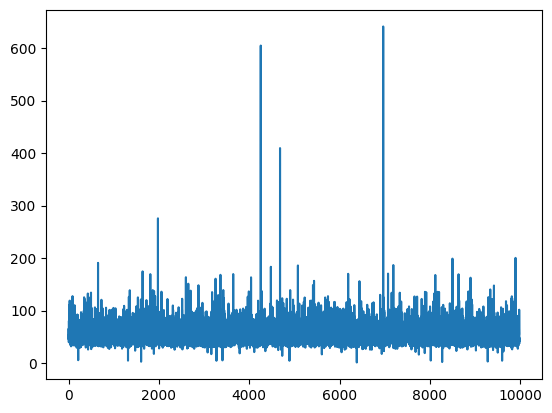

In [99]:
plt.plot(df_train['Square'])
#есть аномальные значения и те которые близки к нулю.

In [100]:
df_train[df_train['Square']<10]
#однако у этих значений не всегда соразмерна LifeSquare

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
212,1748,88,2.0,5.497061,67.628717,1.0,24,22.0,1977,0.127376,B,B,43,8429,3,NaN,3,9,B,412511.088764
1315,11526,27,1.0,4.633498,1.969969,1.0,18,1.0,1977,0.011654,B,B,4,915,0,NaN,0,0,B,107604.269441
1605,10202,6,1.0,2.596351,4.604943,1.0,3,25.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B,137597.601458
3274,10527,27,1.0,4.380726,40.805837,1.0,10,17.0,2013,0.211401,B,B,9,1892,0,NaN,0,1,B,97560.720383
3407,9487,5,1.0,5.129222,5.549458,1.0,1,1.0,1977,0.150818,B,B,16,3433,4,2643.0,4,5,B,369472.403061
4891,4504,27,3.0,4.390331,5.610772,1.0,8,19.0,2016,0.211401,B,B,9,1892,0,NaN,0,1,B,161379.067034
6382,14786,1,1.0,1.136859,4.525736,1.0,3,1.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,181434.825589
8020,13265,1,3.0,4.823679,79.767964,0.0,6,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,237716.681261
8273,15744,34,1.0,1.988943,2.642219,1.0,21,4.0,1977,0.069753,B,B,53,13670,4,NaN,1,11,B,458378.777006
9282,6782,45,1.0,2.954309,5.257278,1.0,3,1.0,1977,0.195781,B,B,23,5212,6,NaN,3,2,B,438005.182323


In [101]:
df_train['LifeSquare'].sort_values(ascending=False)

4321    7480.592129
6967     638.163193
8427     461.463614
4682     410.639749
589      263.542020
           ...     
9973            NaN
9974            NaN
9975            NaN
9982            NaN
9985            NaN
Name: LifeSquare, Length: 9988, dtype: float64

In [102]:
#Одназначно нужно удалять такую аномалию
df_train.drop(index=4321, inplace=True)


In [103]:
df_train[df_train['LifeSquare']<1.3]
#Обратная картина, при отсутствии рационального значения LifeSquare, присутствие реального Square.

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
26,4378,27,3.0,106.958871,0.641822,0.0,17,0.0,2018,0.072158,B,B,2,629,1,NaN,0,0,A,337299.867936
363,15751,9,1.0,44.171793,1.251846,1.0,11,18.0,2017,0.161532,B,B,25,5648,1,30.0,2,4,B,134910.715588
2881,15402,27,2.0,58.521098,1.049867,1.0,4,17.0,2014,0.072158,B,B,2,629,1,NaN,0,0,A,142393.084641
3724,12049,1,2.0,61.541353,1.242250,1.0,20,22.0,2014,0.007122,B,B,1,264,0,NaN,0,1,B,206168.319222
3928,12198,6,1.0,41.939733,1.071193,1.0,12,17.0,2019,0.243205,B,B,5,1564,0,540.0,0,0,B,127233.289627
4261,6631,85,1.0,48.990533,1.104689,1.0,5,17.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,124761.832592
4518,915,6,2.0,66.854936,1.258886,1.0,8,1.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,180416.401098
5615,7558,9,3.0,80.288136,1.297030,1.0,14,18.0,1977,0.161532,B,B,25,5648,1,30.0,2,4,B,254966.798112
6344,10930,9,2.0,65.568381,1.150046,1.0,6,1.0,1977,0.161532,B,B,25,5648,1,30.0,2,4,B,187858.706484
6599,13491,0,1.0,38.178277,0.370619,0.0,19,17.0,2016,0.006076,B,B,30,5285,0,645.0,6,6,B,105134.286994


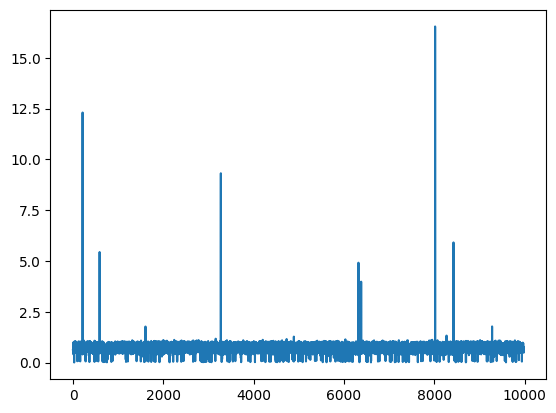

In [104]:
#Посмотрим их соотношение
lifestrain_notna = df_train[df_train['LifeSquare'].notna()]
div_squares = lifestrain_notna ['LifeSquare']/lifestrain_notna ['Square']
plt.plot(div_squares)

In [105]:
errors = df_train[df_train.index.isin(div_squares[div_squares>1.2].index)].copy()
errors
#cкорее всего эти значения были перепутаны

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
212,1748,88,2.0,5.497061,67.628717,1.0,24,22.0,1977,0.127376,B,B,43,8429,3,NaN,3,9,B,412511.088764
589,14990,23,2.0,48.449873,263.542020,5.0,6,5.0,1972,0.075779,B,B,6,1437,3,NaN,0,2,B,141780.231857
1605,10202,6,1.0,2.596351,4.604943,1.0,3,25.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B,137597.601458
3274,10527,27,1.0,4.380726,40.805837,1.0,10,17.0,2013,0.211401,B,B,9,1892,0,NaN,0,1,B,97560.720383
4891,4504,27,3.0,4.390331,5.610772,1.0,8,19.0,2016,0.211401,B,B,9,1892,0,NaN,0,1,B,161379.067034
6322,8961,27,1.0,33.398983,164.153360,6.0,3,5.0,1965,0.211401,B,B,9,1892,0,NaN,0,1,B,104891.073757
6382,14786,1,1.0,1.136859,4.525736,1.0,3,1.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,181434.825589
8020,13265,1,3.0,4.823679,79.767964,0.0,6,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,237716.681261
8273,15744,34,1.0,1.988943,2.642219,1.0,21,4.0,1977,0.069753,B,B,53,13670,4,NaN,1,11,B,458378.777006
8427,15886,85,3.0,78.059331,461.463614,10.0,12,16.0,1998,0.037178,B,B,52,11217,1,2300.0,1,7,B,394253.299978


In [106]:
df_train.loc[errors.index, 'Square'] = errors['LifeSquare']
df_train.loc[errors.index, 'LifeSquare'] = errors['Square']
df_train[df_train.index.isin(div_squares[div_squares>1.2].index)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
212,1748,88,2.0,67.628717,5.497061,1.0,24,22.0,1977,0.127376,B,B,43,8429,3,NaN,3,9,B,412511.088764
589,14990,23,2.0,263.542020,48.449873,5.0,6,5.0,1972,0.075779,B,B,6,1437,3,NaN,0,2,B,141780.231857
1605,10202,6,1.0,4.604943,2.596351,1.0,3,25.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B,137597.601458
3274,10527,27,1.0,40.805837,4.380726,1.0,10,17.0,2013,0.211401,B,B,9,1892,0,NaN,0,1,B,97560.720383
4891,4504,27,3.0,5.610772,4.390331,1.0,8,19.0,2016,0.211401,B,B,9,1892,0,NaN,0,1,B,161379.067034
6322,8961,27,1.0,164.153360,33.398983,6.0,3,5.0,1965,0.211401,B,B,9,1892,0,NaN,0,1,B,104891.073757
6382,14786,1,1.0,4.525736,1.136859,1.0,3,1.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,181434.825589
8020,13265,1,3.0,79.767964,4.823679,0.0,6,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,237716.681261
8273,15744,34,1.0,2.642219,1.988943,1.0,21,4.0,1977,0.069753,B,B,53,13670,4,NaN,1,11,B,458378.777006
8427,15886,85,3.0,461.463614,78.059331,10.0,12,16.0,1998,0.037178,B,B,52,11217,1,2300.0,1,7,B,394253.299978


In [107]:
#Отлично позже вернемся к этому столбу и заменим разные ирациональные значения и NaN используя машиное обучение

df_train['KitchenSquare'].sort_values(ascending=False)
#Два аномальных значения похожие на значение года


1063    2014.0
8574    1970.0
9883     123.0
4643     112.0
2963     112.0
         ...  
2677       0.0
9002       0.0
5468       0.0
9015       0.0
923        0.0
Name: KitchenSquare, Length: 9987, dtype: float64

In [108]:
df_train[df_train['KitchenSquare']>1900]
#Дествительно так оно и есть

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1063,14656,62,1.0,47.100719,46.447960,2014.0,4,1.0,2014,0.072158,B,B,2,629,1,NaN,0,0,A,108337.484207
8574,14679,81,1.0,32.276663,19.278394,1970.0,6,1.0,1977,0.006076,B,B,30,5285,0,645.0,6,6,B,105539.556275


In [109]:
x = df_train[df_train['LifeSquare']>40][df_train['LifeSquare']<50]
re_1063 = round(x['KitchenSquare'].sort_values(ascending=False)[1:].mean())
x = df_train[df_train['LifeSquare']>15][df_train['LifeSquare']<25]
re_8574 = round(x['KitchenSquare'].sort_values(ascending=False)[1:].mean())

#новые значения
df_train.loc[1063, 'KitchenSquare'] = re_1063
df_train.loc[8574, 'KitchenSquare'] = re_8574

C:\Users\BMelWe\AppData\Local\Temp\ipykernel_9192\3865302582.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x = df_train[df_train['LifeSquare']>40][df_train['LifeSquare']<50]
C:\Users\BMelWe\AppData\Local\Temp\ipykernel_9192\3865302582.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  re_1063 = round(x['KitchenSquare'].sort_values(ascending=False)[1:].mean())
C:\Users\BMelWe\AppData\Local\Temp\ipykernel_9192\3865302582.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x = df_train[df_train['LifeSquare']>15][df_train['LifeSquare']<25]
C:\Users\BMelWe\AppData\Local\Temp\ipykernel_9192\3865302582.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-d

In [110]:
df_train['Floor'].sort_values(ascending=False)
#Выглядит рационально

2775    42
6745    37
8347    33
339     32
3324    32
        ..
6011     1
2982     1
1615     1
4849     1
689      1
Name: Floor, Length: 9987, dtype: int64

In [111]:
df_train['HouseFloor'].sort_values(ascending=False)

8842    117.0
6122     99.0
8589     99.0
7718     48.0
2775     48.0
        ...  
6903      0.0
2098      0.0
8699      0.0
3898      0.0
8704      0.0
Name: HouseFloor, Length: 9987, dtype: float64

In [112]:
no_floor = df_train[df_train['HouseFloor']==0]
no_floor
#количество этажей не указано однако заметно что они существуют

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
7,11993,74,2.0,80.312926,NaN,0.0,14,0.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,221244.156664
23,6641,54,3.0,118.907612,NaN,0.0,2,0.0,1977,0.006076,B,B,30,5285,0,645.0,6,6,B,571069.052600
26,4378,27,3.0,106.958871,0.641822,0.0,17,0.0,2018,0.072158,B,B,2,629,1,NaN,0,0,A,337299.867936
39,9371,23,2.0,60.503248,NaN,0.0,16,0.0,1977,0.034656,B,B,0,168,0,NaN,0,0,B,229778.057902
44,10521,38,3.0,104.211396,106.340403,0.0,20,0.0,2017,0.060753,B,B,15,2787,2,520.0,0,7,B,435462.048070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9695,12302,30,1.0,46.072913,48.307844,0.0,4,0.0,1977,0.000078,B,B,22,6398,141,1046.0,3,23,B,161403.094034
9757,9384,59,3.0,98.607328,NaN,0.0,14,0.0,1977,0.019509,B,B,37,7687,11,176.0,5,5,B,492700.257473
9866,11441,62,2.0,71.985335,72.453232,0.0,5,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,158841.624543
9896,3171,62,1.0,35.873961,NaN,0.0,25,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,134379.130962


In [113]:
#Установим среднее соотношение, его и используем

df_floor = df_train[df_train['HouseFloor']>=1]
div = (df_floor['Floor']/df_floor['HouseFloor']).mean()
df_train.loc[no_floor.index, 'HouseFloor']=round(no_floor["Floor"]/div)


In [114]:
df_train.loc[no_floor.index]
#Выглядит ирационально, однако по идее это сохраняет целостную картину.

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
7,11993,74,2.0,80.312926,NaN,0.0,14,13.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,221244.156664
23,6641,54,3.0,118.907612,NaN,0.0,2,2.0,1977,0.006076,B,B,30,5285,0,645.0,6,6,B,571069.052600
26,4378,27,3.0,106.958871,0.641822,0.0,17,15.0,2018,0.072158,B,B,2,629,1,NaN,0,0,A,337299.867936
39,9371,23,2.0,60.503248,NaN,0.0,16,14.0,1977,0.034656,B,B,0,168,0,NaN,0,0,B,229778.057902
44,10521,38,3.0,104.211396,106.340403,0.0,20,18.0,2017,0.060753,B,B,15,2787,2,520.0,0,7,B,435462.048070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9695,12302,30,1.0,46.072913,48.307844,0.0,4,4.0,1977,0.000078,B,B,22,6398,141,1046.0,3,23,B,161403.094034
9757,9384,59,3.0,98.607328,NaN,0.0,14,13.0,1977,0.019509,B,B,37,7687,11,176.0,5,5,B,492700.257473
9866,11441,62,2.0,71.985335,72.453232,0.0,5,4.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,158841.624543
9896,3171,62,1.0,35.873961,NaN,0.0,25,22.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,134379.130962


In [115]:
year = df_train['HouseYear'].sort_values(ascending=False)
year
#первая дата похожа на две даты 
#вторая вероятно означает 1968

1494    20052011
4182        4968
8243        2020
7066        2020
4046        2020
          ...   
7601        1916
909         1914
2650        1912
5102        1912
9305        1910
Name: HouseYear, Length: 9987, dtype: int64

In [116]:
df_train.loc[year.index[0], 'HouseYear']=2011
df_train.loc[year.index[1], 'HouseYear']=1968
df_train['HouseYear'].sort_values(ascending=False)

3479    2020
8243    2020
4046    2020
5692    2020
9662    2020
        ... 
7601    1916
909     1914
2650    1912
5102    1912
9305    1910
Name: HouseYear, Length: 9987, dtype: int64

In [117]:
#Необходимо дать категориальный тип соответствующим столбам и кодировать их
df_train['Ecology_2']=df_train['Ecology_2'].astype('category')
df_train['Ecology_3']=df_train['Ecology_3'].astype('category')
df_train['Shops_2']=df_train['Shops_2'].astype('category')

df_train['Ecology_2'] = df_train['Ecology_2'].apply(lambda x : 0 if x == 'A' else 1)
df_train['Ecology_3'] = df_train['Ecology_3'].apply(lambda x : 0 if x == 'A' else 1)
df_train['Shops_2'] = df_train['Shops_2'].apply(lambda x : 0 if x == 'A' else 1)



In [118]:
#нашел взаимосвязь с показателем района, в основном встречаются одни и теже парметры
# средняя вероятность что преобладает один из них = 0.82
#mean ставить думаю не коректно т.к это одни и те же значения
#поставлю часто встречающиеся
#есть районы с отутствием показателей вообще, такие придется заполнить средним значением

for i in df_train['DistrictId'].unique():  
    target = df_train[df_train['DistrictId']==i]['Healthcare_1']
    a = target.value_counts().index
    if len(a)>0:
        df_train.loc[target.index, 'Healthcare_1'] = target.fillna(a[0])
    else:
        df_train.loc[target.index, 'Healthcare_1']  = target.fillna(df_train['Healthcare_1'].mean())

df_train['Healthcare_1'].isna().sum()

0

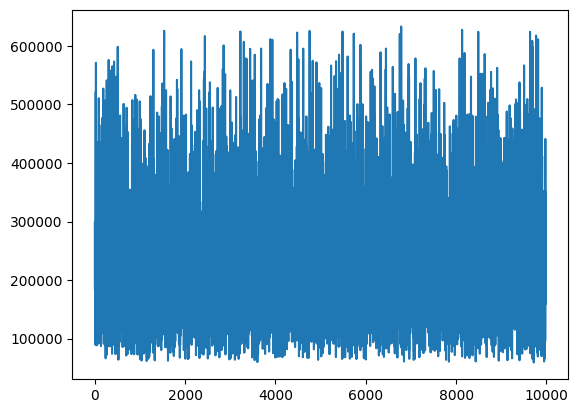

In [119]:

plt.plot(df_train['Price'])
#Значительных выбросов нет

(array([ 915., 2789., 3163., 1433.,  729.,  437.,  254.,  154.,   72.,
          41.]),
 array([ 59174.77802758, 116580.64688182, 173986.51573605, 231392.38459029,
        288798.25344453, 346204.12229876, 403609.991153  , 461015.86000724,
        518421.72886147, 575827.59771571, 633233.46656995]),
 <BarContainer object of 10 artists>)

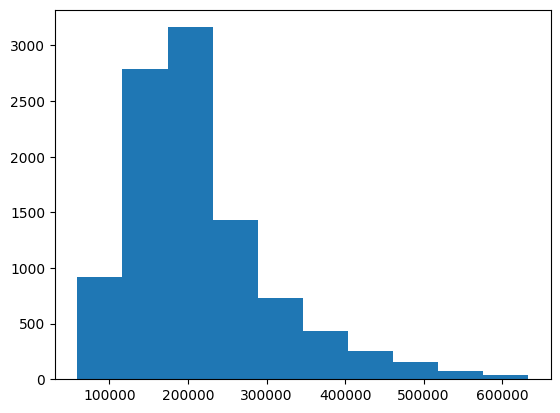

In [120]:
plt.hist(df_train['Price'])
#выглядит рационально

In [121]:
def weight_columns(df, y, put_model, rs=42):
    """
    df - датафрейм(первоначальный x)
    y - столбец который нужно предсказывать
    rs - random_state
    put_model - используемая модель

    Функция переберает столбцы таким образом чтобы вернуть те,
    при исопльзовании которых будет наивысший результат r2_score.
    Это будет означать что вот эти столбцы имеют действительное
    влияние на формирование предсказуемого столба, в рамках данной
    модели конечно.
    """
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import r2_score

    df_columns = list(df.columns)
    df_0 = list(df.columns[:2])

    x = df.loc[:, df_0]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=rs)
    model = put_model()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)

    power_columns = []+df_0
    for i in df.columns[2:]:
        c_power_columns = power_columns.copy()
        c_power_columns.append(i)
        x = df.loc[:, c_power_columns]
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=rs)
        model = put_model()
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        r2_new = r2_score(y_test, y_pred)

        if r2_new>r2:
            print(i, r2_new, "+")
            r2=r2_new
            power_columns.append(i)
        else:
            print(i, r2_new, "-")

    for i in df_0:
        c_power_columns = power_columns.copy()
        c_power_columns.remove(i)
        x = df.loc[:, c_power_columns]
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=rs)
        model = put_model()
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        r2_new = r2_score(y_test, y_pred)

        print(i, r2_new)
        if r2_new>r2:
            print(i, r2_new, "+")
            r2=r2_new
            power_columns.remove(i)
        else:
            print(i, r2_new, "-")

    return [power_columns, r2]

In [122]:
from sklearn.linear_model import LinearRegression
x_0 = df_test_L.drop(columns=['LifeSquare', 'Id'])
y = df_test_L['LifeSquare']
res = weight_columns(x_0, y, LinearRegression)

Square 0.6759520770561906 +
KitchenSquare 0.6912743440808389 +
Floor 0.6912813362644147 +
HouseFloor 0.6906218642952948 -
HouseYear 0.6856640602597968 -
Ecology_1 0.6908349105365481 -
Ecology_2 0.6911452756032397 -
Ecology_3 0.6911264396980401 -
Social_1 0.6880661570755393 -
Social_2 0.6895509180623873 -
Social_3 0.6932625281092066 +
Healthcare_1 0.6930207360273468 -
Helthcare_2 0.6934525568766429 +
Shops_1 0.6932913407716765 -
Shops_2 0.6934796811412594 +
Price 0.7008812324299712 +
DistrictId 0.7029532206543256
DistrictId 0.7029532206543256 +
Rooms 0.7179491624691801
Rooms 0.7179491624691801 +


In [123]:
#Предскажем значения LifeSquare
model = LinearRegression()
df_train_L_train = df_train[df_train['LifeSquare'].notna()]
x = df_train_L_train.drop(columns=['LifeSquare'])
x = df_train_L_train.loc[:, res[0]]
y = df_train_L_train['LifeSquare']
model.fit(x, y)

df_train_L_pred = df_train[df_train['LifeSquare'].isna()]
x_val = df_train_L_pred.drop(columns=['LifeSquare'])
x_val = df_train_L_pred.loc[:, res[0]]
y_pred = model.predict(x_val)

indexes = df_train[df_train['LifeSquare'].isna()].index
df_train['LifeSquare'].fillna(pd.Series(y_pred, index=indexes), inplace=True)

print(f"если test_size=0.25 то r2_score={res[1]}")

если test_size=0.25 то r2_score=0.7179491624691801


In [124]:
df_train.to_csv('train_pre_1.сsv', sep=',', encoding='utf')